In [1]:
import pandas as pd
file_path = '../MONDO_0004975_associations_export.tsv'
df = pd.read_csv(file_path, sep='\t')

# Step 2: Check column names to confirm correct p-value column
print(df.columns)

# Step 3: Filter SNPs with p-value < 1e-8
filtered_df = df[df['pValue'] < 1e-5]

# Step 4: Keep only variantId ending with -A, -T, -C, or -G (exclude -?)
filtered_df = filtered_df[filtered_df['riskAllele'].str.match(r'^rs\d+-[ATCG]$', na=False)]
#convert - to _
filtered_df['riskAllele'] = filtered_df['riskAllele'].str.replace('-', '_')
print(filtered_df['riskAllele'].head())
p_value5_id = filtered_df['riskAllele'].tolist()
# Step 5: Print the first 5 SNPs with p-value < 1e-8
print("SNPs with p-value < 1e-8:")
for snp in p_value5_id:
    print(snp)

Index(['riskAllele', 'pValue', 'pValueAnnotation', 'riskFrequency', 'orValue',
       'beta', 'ci', 'mappedGenes', 'traitName', 'efoTraits', 'bgTraits',
       'accessionId', 'locations', 'pubmedId', 'author'],
      dtype='object')
1     rs8077028_T
2     rs2244526_T
3    rs17022021_T
4     rs1034435_A
5     rs4760243_A
Name: riskAllele, dtype: object
SNPs with p-value < 1e-8:
rs8077028_T
rs2244526_T
rs17022021_T
rs1034435_A
rs4760243_A
rs7260181_T
rs12716755_A
rs3820443_T
rs846858_A
rs5771225_T
rs7313581_T
rs2699450_A
rs6945197_T
rs184992198_T
rs115972394_A
rs73215707_T
rs79926713_T
rs73732514_A
rs62177277_T
rs73681522_A
rs2234017_C
rs147597631_T
rs145848414_A
rs147985478_A
rs116050881_T
rs186542490_A
rs186076999_T
rs141521929_T
rs73865608_A
rs184614511_T
rs193129245_A
rs150061627_T
rs190457471_A
rs141387448_T
rs117760708_T
rs187423924_A
rs181634374_T
rs145228677_C
rs188699384_A
rs148003968_A
rs185867524_A
rs117756856_A
rs184457411_A
rs180751169_T
rs188392327_A
rs192232892_T
rs149839

In [2]:
import pandas as pd
data_with_no_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols= lambda x: not x.endswith('.'), nrows=5)

C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_11624\436810400.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_with_no_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols= lambda x: not x.endswith('.'), nrows=5)


In [3]:
len(data_with_no_filtering.columns)

592538

In [4]:
id_of_pvalue5 = []
for col in data_with_no_filtering.columns:
    if col in p_value5_id:
        print(col, "is in the list")
        id_of_pvalue5.append(col)
print(id_of_pvalue5)


rs4255357_G is in the list
rs2970989_T is in the list
rs1552244_A is in the list
rs17022021_T is in the list
rs9832461_A is in the list
rs17785248_A is in the list
rs4974424_A is in the list
rs1923775_T is in the list
rs1448284_T is in the list
rs10012882_T is in the list
rs13178362_T is in the list
rs29745_A is in the list
rs6882046_A is in the list
rs543844_A is in the list
rs9381563_T is in the list
rs2718058_A is in the list
rs11771145_G is in the list
rs7016182_C is in the list
rs956225_A is in the list
rs474951_T is in the list
rs7155434_A is in the list
rs10498633_G is in the list
rs2456930_G is in the list
rs8049439_T is in the list
rs450674_T is in the list
rs16973424_A is in the list
rs440277_G is in the list
rs8106922_A is in the list
rs5167_T is in the list
['rs4255357_G', 'rs2970989_T', 'rs1552244_A', 'rs17022021_T', 'rs9832461_A', 'rs17785248_A', 'rs4974424_A', 'rs1923775_T', 'rs1448284_T', 'rs10012882_T', 'rs13178362_T', 'rs29745_A', 'rs6882046_A', 'rs543844_A', 'rs93815

In [5]:
# read the data again with the selected columns and first 6 columns of data and first 5 rows
metadata_cols = ['IID', 'SEX', 'PHENOTYPE',]

# Combine metadata columns with your filtered SNP rsIDs
columns_to_use = metadata_cols + id_of_pvalue5

# Read only those columns (first 5 + selected SNPs) and first 5 rows
data_with_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols=columns_to_use)


C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_11624\990478919.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_with_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols=columns_to_use)


In [6]:
#caclulate missing values of every column
missing_values = data_with_filtering.isnull().sum()
# Print the missing values
print("Missing values in each column:")
print(missing_values)
#see the minimum and median and maximum of the data


Missing values in each column:
IID             0
SEX             0
PHENOTYPE       0
rs4255357_G     7
rs2970989_T     0
rs1552244_A     0
rs17022021_T    0
rs9832461_A     0
rs17785248_A    4
rs4974424_A     2
rs1923775_T     0
rs1448284_T     0
rs10012882_T    2
rs13178362_T    1
rs29745_A       1
rs6882046_A     2
rs543844_A      0
rs9381563_T     9
rs2718058_A     1
rs11771145_G    0
rs7016182_C     0
rs956225_A      0
rs474951_T      1
rs7155434_A     2
rs10498633_G    0
rs2456930_G     1
rs8049439_T     0
rs450674_T      0
rs16973424_A    1
rs440277_G      0
rs8106922_A     0
rs5167_T        0
dtype: int64


In [7]:
# Load ADNIMERGE
adni_merge = pd.read_csv('../ADNIMERGE_11May2025.csv')

# Filter to baseline diagnoses
adni_dx = adni_merge[adni_merge['VISCODE'] == 'bl'][['RID', 'DX']]

# Extract RID from IID if needed (only if IID is like '014_S_0520')
data_with_filtering['RID'] = data_with_filtering['IID'].str.extract(r'_(\d+)$')[0].astype(int)

# Merge DX into your dataset
data_with_filtering = data_with_filtering.merge(adni_dx, on='RID', how='left')

# Drop RID if no longer needed
data_with_filtering.drop(columns=['RID'], inplace=True)

# Check merge result
print("Missing DX labels:", data_with_filtering['DX'].isna().sum())

Missing DX labels: 0


C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_11624\4016535944.py:2: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  adni_merge = pd.read_csv('../ADNIMERGE_11May2025.csv')


In [8]:
print(data_with_filtering.columns)


Index(['IID', 'SEX', 'PHENOTYPE', 'rs4255357_G', 'rs2970989_T', 'rs1552244_A',
       'rs17022021_T', 'rs9832461_A', 'rs17785248_A', 'rs4974424_A',
       'rs1923775_T', 'rs1448284_T', 'rs10012882_T', 'rs13178362_T',
       'rs29745_A', 'rs6882046_A', 'rs543844_A', 'rs9381563_T', 'rs2718058_A',
       'rs11771145_G', 'rs7016182_C', 'rs956225_A', 'rs474951_T',
       'rs7155434_A', 'rs10498633_G', 'rs2456930_G', 'rs8049439_T',
       'rs450674_T', 'rs16973424_A', 'rs440277_G', 'rs8106922_A', 'rs5167_T',
       'DX'],
      dtype='object')


In [9]:
columns_to_remove = [ 'IID','SEX','PHENOTYPE']  # Adjust the list based on your data

# Drop the specified columns
data_cleaned_with_just_dx_and_snp = data_with_filtering.drop(columns=columns_to_remove)
#convert data_cleaned_with_just_dx_and_snp to file

In [10]:
# Fill missing values with mode for all columns except 'DX'
for column in data_cleaned_with_just_dx_and_snp.columns:
    if column != 'DX':
        mode_value = data_cleaned_with_just_dx_and_snp[column].mode()[0]
        data_cleaned_with_just_dx_and_snp[column].fillna(mode_value, inplace=True)

C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_11624\1545016660.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned_with_just_dx_and_snp[column].fillna(mode_value, inplace=True)
C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_11624\1545016660.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [11]:
# Map DX values to numerical values
dx_mapping = {'CN': 0, 'MCI': 0, 'Dementia': 1}
data_cleaned_with_just_dx_and_snp['DX'] = data_cleaned_with_just_dx_and_snp['DX'].replace(dx_mapping)

C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_11624\2107091537.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned_with_just_dx_and_snp['DX'] = data_cleaned_with_just_dx_and_snp['DX'].replace(dx_mapping)


In [12]:
print(data_cleaned_with_just_dx_and_snp['DX'].value_counts())

DX
0    577
1    180
Name: count, dtype: int64


In [13]:
#change all float64 columns to int64
for column in data_cleaned_with_just_dx_and_snp.columns:
    if data_cleaned_with_just_dx_and_snp[column].dtype == 'float64':
        data_cleaned_with_just_dx_and_snp[column] = data_cleaned_with_just_dx_and_snp[column].astype('int64')
#save the data_cleaned_with_just_dx_and_snp to a file

In [14]:
# train and test split
from sklearn.model_selection import train_test_split
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']


=== Evaluating: Logistic Regression ===
Accuracy:            0.7518
Balanced Accuracy:   0.5000
F1 Score (macro):    0.4292
Recall (Sensitivity):0.5000
ROC AUC Score:       0.5077
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       103
           1       0.00      0.00      0.00        34

    accuracy                           0.75       137
   macro avg       0.38      0.50      0.43       137
weighted avg       0.57      0.75      0.65       137


=== Evaluating: SVM (Linear) ===
Accuracy:            0.7518
Balanced Accuracy:   0.5000
F1 Score (macro):    0.4292
Recall (Sensitivity):0.5000
ROC AUC Score:       0.4923
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       103
           1       0.00      0.00      0.00        34

    accuracy                           0.75       137
   macro avg       0.38      0.50      0.43       137


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:08:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Evaluating: Extra Trees ===
Accuracy:            0.7518
Balanced Accuracy:   0.5000
F1 Score (macro):    0.4292
Recall (Sensitivity):0.5000
ROC AUC Score:       0.4936
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       103
           1       0.00      0.00      0.00        34

    accuracy                           0.75       137
   macro avg       0.38      0.50      0.43       137
weighted avg       0.57      0.75      0.65       137


=== Evaluating: Bagging (RF Base) ===
Accuracy:            0.7007
Balanced Accuracy:   0.4759
F1 Score (macro):    0.4345
Recall (Sensitivity):0.4759
ROC AUC Score:       0.5844
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       103
           1       0.11      0.03      0.05        34

    accuracy                           0.70       137
   macro avg       0.43      0.48      0.43       137
wei

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== Evaluating: AdaBoost ===
Accuracy:            0.7299
Balanced Accuracy:   0.4854
F1 Score (macro):    0.4219
Recall (Sensitivity):0.4854
ROC AUC Score:       0.5197
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.84       103
           1       0.00      0.00      0.00        34

    accuracy                           0.73       137
   macro avg       0.37      0.49      0.42       137
weighted avg       0.56      0.73      0.63       137


=== Evaluating: HistGradientBoosting ===
Accuracy:            0.7080
Balanced Accuracy:   0.5004
F1 Score (macro):    0.4775
Recall (Sensitivity):0.5004
ROC AUC Score:       0.5291
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       103
           1       0.25      0.09      0.13        34

    accuracy                           0.71       137
   macro avg       0.50      0.50      0.48       137
wei

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Evaluating: Neural Network (Basic) ===
Accuracy:            0.6934
Balanced Accuracy:   0.4907
F1 Score (macro):    0.4696
Recall (Sensitivity):0.4907
ROC AUC Score:       0.5143
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       103
           1       0.21      0.09      0.12        34

    accuracy                           0.69       137
   macro avg       0.48      0.49      0.47       137
weighted avg       0.62      0.69      0.64       137



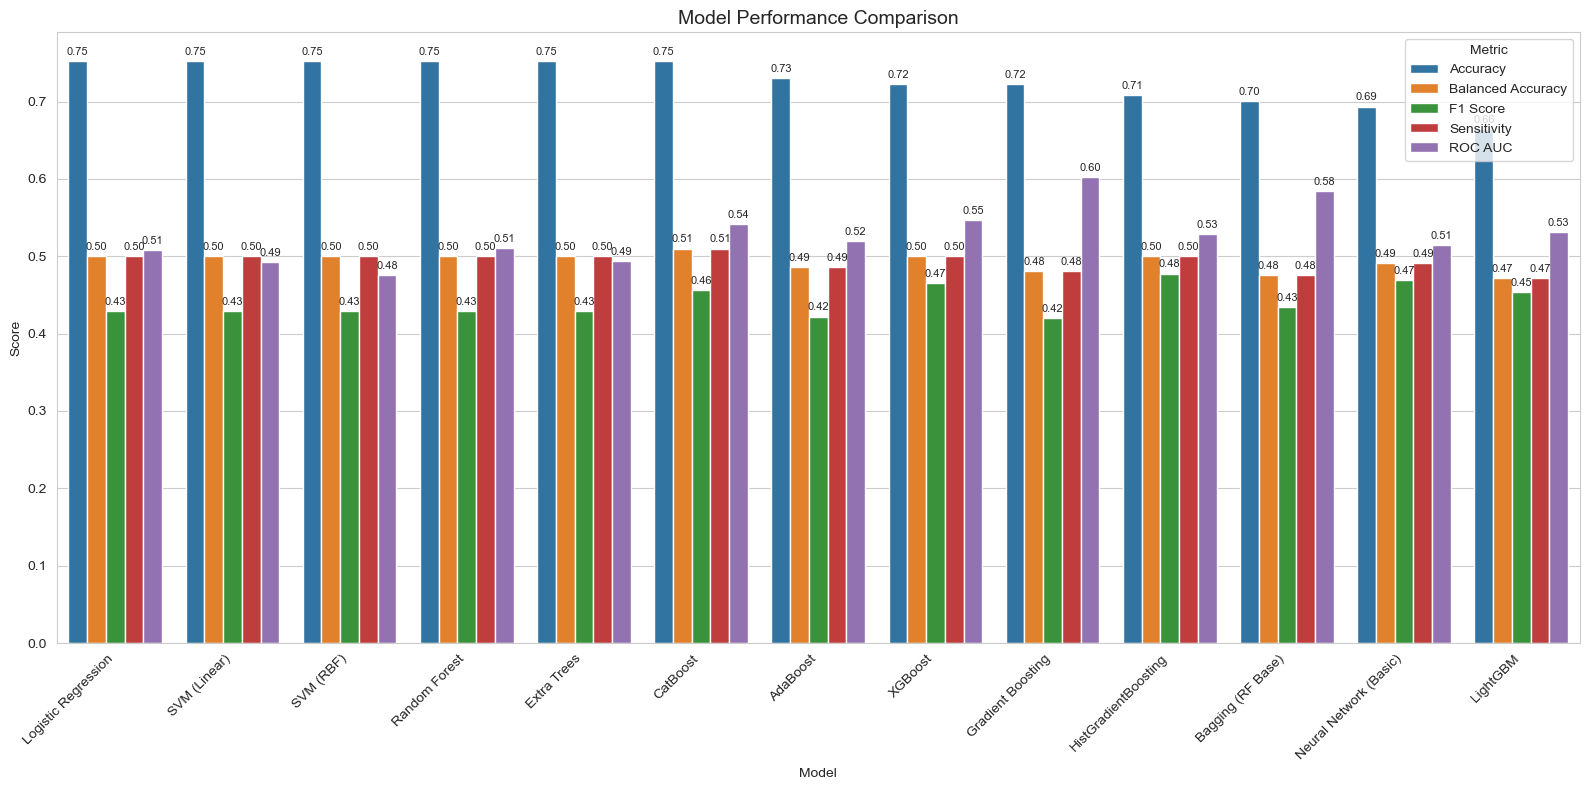

In [15]:
# ---------------------
# Import Libraries
# ---------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    recall_score, roc_auc_score, classification_report
)
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ---------------------
# Prepare Dataset
# ---------------------
# Assume X and y are defined before this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# ---------------------
# Define Models with Few Important Parameters
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(
        solver='lbfgs',
        max_iter=200,
        random_state=42
    ),
    
    "SVM (Linear)": SVC(
        kernel="linear",
        probability=True,
        C=1.0
    ),
    
    "SVM (RBF)": SVC(
        kernel="rbf",
        probability=True,
        C=1.0,
        gamma='scale'
    ),
    
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ),
    
    "XGBoost": XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ),
    
    "Extra Trees": ExtraTreesClassifier(
        n_estimators=100,
        random_state=42
    ),
    
    "Bagging (RF Base)": BaggingClassifier(
        n_estimators=10,
        random_state=42
    ),
    
    "LightGBM": LGBMClassifier(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42,
        verbosity=-1
    ),
    
    "CatBoost": CatBoostClassifier(
        iterations=100,
        learning_rate=0.1,
        depth=6,
        verbose=0,
        random_seed=42
    ),
    
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    ),
    
    "AdaBoost": AdaBoostClassifier(
        n_estimators=50,
        learning_rate=1.0,
        random_state=42
    ),
    
    "HistGradientBoosting": HistGradientBoostingClassifier(
        max_iter=100,
        learning_rate=0.1,
        random_state=42
    ),
    
    "Neural Network (Basic)": MLPClassifier(
        hidden_layer_sizes=(100,),
        max_iter=300,
        random_state=42
    )
}

# ---------------------
# Evaluation Function
# ---------------------
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    sensitivity = recall_score(y_test, y_pred, average='macro')

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_score)
    except:
        roc_auc = np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1 Score": f1,
        "Sensitivity": sensitivity,
        "ROC AUC": roc_auc
    })

    print(f"\n=== Evaluating: {name} ===")
    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bal_acc:.4f}")
    print(f"F1 Score (macro):    {f1:.4f}")
    print(f"Recall (Sensitivity):{sensitivity:.4f}")
    print(f"ROC AUC Score:       {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# ---------------------
# Run and Evaluate Models
# ---------------------
for name, model in base_models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

# ---------------------
# Plot Results with Value Labels
# ---------------------
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="Accuracy", ascending=False)

# Melt for seaborn
df_melted = df_results_sorted.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="tab10")

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3, fontsize=8)

plt.title("Model Performance Comparison", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Metric")
plt.show()



=== Evaluating: Logistic Regression ===
Accuracy:            0.8264
Balanced Accuracy:   0.5035
F1 Score (macro):    0.4891
Recall (Sensitivity):0.5035
ROC AUC Score:       0.5436
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       123
           1       0.17      0.05      0.07        21

    accuracy                           0.83       144
   macro avg       0.51      0.50      0.49       144
weighted avg       0.75      0.83      0.78       144


=== Evaluating: SVM (Linear) ===
Accuracy:            0.8542
Balanced Accuracy:   0.5000
F1 Score (macro):    0.4607
Recall (Sensitivity):0.5000
ROC AUC Score:       0.4588
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       123
           1       0.00      0.00      0.00        21

    accuracy                           0.85       144
   macro avg       0.43      0.50      0.46       144


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:41:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Evaluating: XGBoost ===
Accuracy:            0.7847
Balanced Accuracy:   0.5186
F1 Score (macro):    0.5193
Recall (Sensitivity):0.5186
ROC AUC Score:       0.4843
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       123
           1       0.19      0.14      0.16        21

    accuracy                           0.78       144
   macro avg       0.52      0.52      0.52       144
weighted avg       0.76      0.78      0.77       144


=== Evaluating: Extra Trees ===
Accuracy:            0.8611
Balanced Accuracy:   0.5436
F1 Score (macro):    0.5455
Recall (Sensitivity):0.5436
ROC AUC Score:       0.6003
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       123
           1       0.67      0.10      0.17        21

    accuracy                           0.86       144
   macro avg       0.77      0.54      0.55       144
weighted avg 

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== Evaluating: AdaBoost ===
Accuracy:            0.8125
Balanced Accuracy:   0.4954
F1 Score (macro):    0.4824
Recall (Sensitivity):0.4954
ROC AUC Score:       0.5052
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       123
           1       0.12      0.05      0.07        21

    accuracy                           0.81       144
   macro avg       0.49      0.50      0.48       144
weighted avg       0.75      0.81      0.78       144


=== Evaluating: HistGradientBoosting ===
Accuracy:            0.7847
Balanced Accuracy:   0.5186
F1 Score (macro):    0.5193
Recall (Sensitivity):0.5186
ROC AUC Score:       0.4646
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       123
           1       0.19      0.14      0.16        21

    accuracy                           0.78       144
   macro avg       0.52      0.52      0.52       144
wei

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Evaluating: Neural Network (Basic) ===
Accuracy:            0.8264
Balanced Accuracy:   0.4837
F1 Score (macro):    0.4525
Recall (Sensitivity):0.4837
ROC AUC Score:       0.5064
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       123
           1       0.00      0.00      0.00        21

    accuracy                           0.83       144
   macro avg       0.42      0.48      0.45       144
weighted avg       0.73      0.83      0.77       144



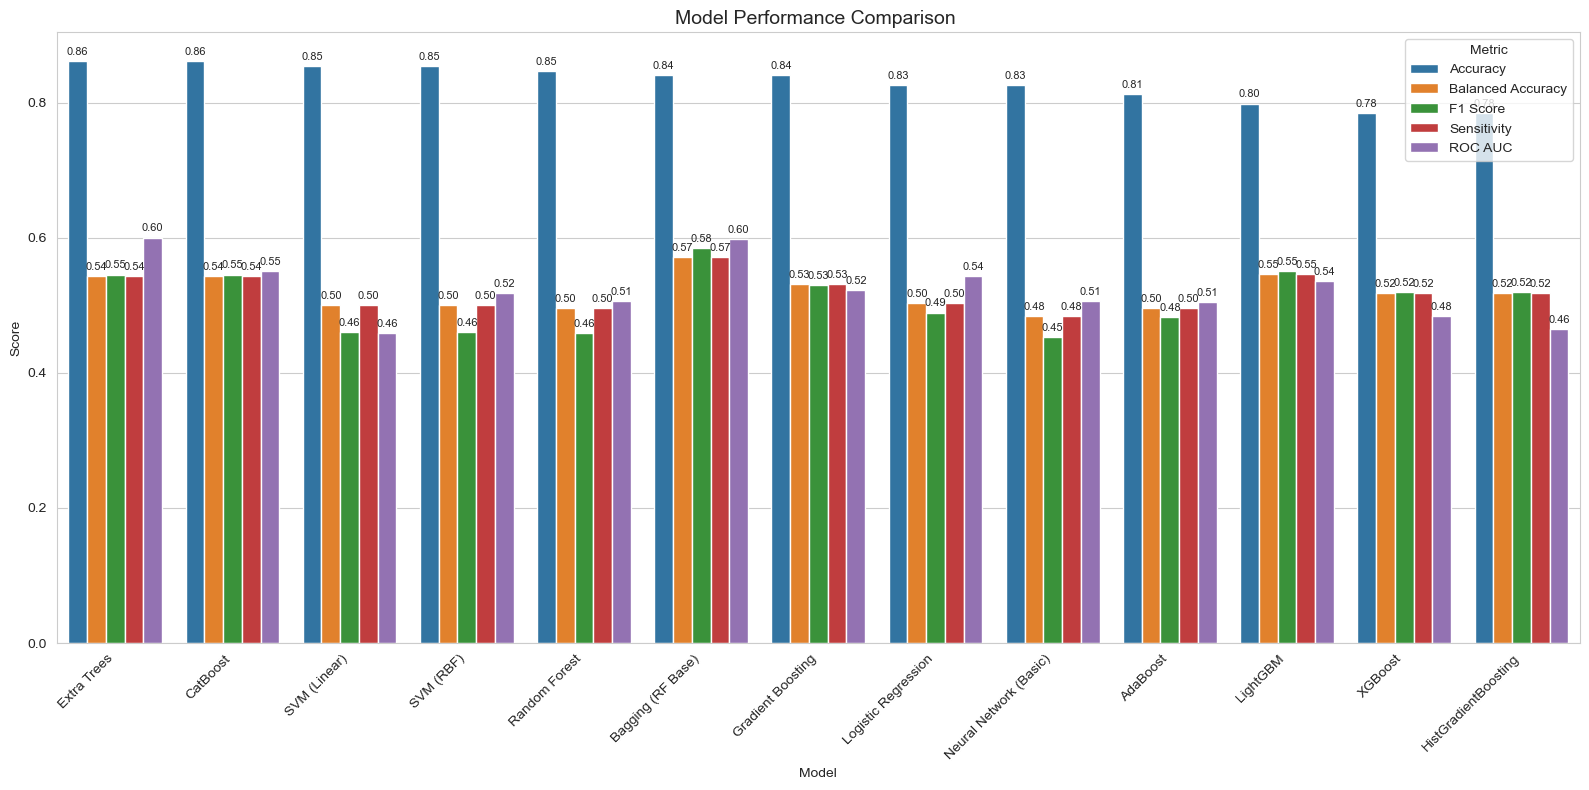

In [15]:
# ---------------------
# Import Libraries
# ---------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    recall_score, roc_auc_score, classification_report
)
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19, random_state=141)

# ---------------------
# Define Models
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear", probability=True),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging (RF Base)": BaggingClassifier(),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Neural Network (Basic)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=141)
}

# ---------------------
# Evaluation Function
# ---------------------
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    sensitivity = recall_score(y_test, y_pred, average='macro')

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_score)
    except:
        roc_auc = np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1 Score": f1,
        "Sensitivity": sensitivity,
        "ROC AUC": roc_auc
    })

    print(f"\n=== Evaluating: {name} ===")
    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bal_acc:.4f}")
    print(f"F1 Score (macro):    {f1:.4f}")
    print(f"Recall (Sensitivity):{sensitivity:.4f}")
    print(f"ROC AUC Score:       {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# ---------------------
# Run and Evaluate Models
# ---------------------
for name, model in base_models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

# ---------------------
# Plot Results with Value Labels
# ---------------------
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="Accuracy", ascending=False)

# Melt for seaborn
df_melted = df_results_sorted.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="tab10")

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3, fontsize=8)

plt.title("Model Performance Comparison ", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Metric")
plt.show()



=== Evaluating: Logistic Regression ===
Accuracy:            0.6042
Balanced Accuracy:   0.5116
F1 Score (macro):    0.4770
Recall (Sensitivity):0.5116
ROC AUC Score:       0.4994
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.64      0.73       123
           1       0.15      0.38      0.22        21

    accuracy                           0.60       144
   macro avg       0.51      0.51      0.48       144
weighted avg       0.76      0.60      0.66       144


=== Evaluating: SVM (Linear) ===
Accuracy:            0.5972
Balanced Accuracy:   0.5273
F1 Score (macro):    0.4816
Recall (Sensitivity):0.5273
ROC AUC Score:       0.4874
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.63      0.73       123
           1       0.16      0.43      0.24        21

    accuracy                           0.60       144
   macro avg       0.51      0.53      0.48       144


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:19:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Evaluating: XGBoost ===
Accuracy:            0.7014
Balanced Accuracy:   0.4895
F1 Score (macro):    0.4877
Recall (Sensitivity):0.4895
ROC AUC Score:       0.4808
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       123
           1       0.13      0.19      0.16        21

    accuracy                           0.70       144
   macro avg       0.49      0.49      0.49       144
weighted avg       0.75      0.70      0.72       144


=== Evaluating: Extra Trees ===
Accuracy:            0.7917
Balanced Accuracy:   0.5424
F1 Score (macro):    0.5453
Recall (Sensitivity):0.5424
ROC AUC Score:       0.5521
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       123
           1       0.24      0.19      0.21        21

    accuracy                           0.79       144
   macro avg       0.55      0.54      0.55       144
weighted avg 

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== Evaluating: AdaBoost ===
Accuracy:            0.6250
Balanced Accuracy:   0.5041
F1 Score (macro):    0.4802
Recall (Sensitivity):0.5041
ROC AUC Score:       0.4878
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75       123
           1       0.15      0.33      0.21        21

    accuracy                           0.62       144
   macro avg       0.50      0.50      0.48       144
weighted avg       0.75      0.62      0.67       144


=== Evaluating: HistGradientBoosting ===
Accuracy:            0.7292
Balanced Accuracy:   0.5650
F1 Score (macro):    0.5491
Recall (Sensitivity):0.5650
ROC AUC Score:       0.5072
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.83       123
           1       0.22      0.33      0.26        21

    accuracy                           0.73       144
   macro avg       0.55      0.57      0.55       144
wei

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Evaluating: Neural Network (Basic) ===
Accuracy:            0.6875
Balanced Accuracy:   0.5012
F1 Score (macro):    0.4943
Recall (Sensitivity):0.5012
ROC AUC Score:       0.4681
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       123
           1       0.15      0.24      0.18        21

    accuracy                           0.69       144
   macro avg       0.50      0.50      0.49       144
weighted avg       0.75      0.69      0.72       144



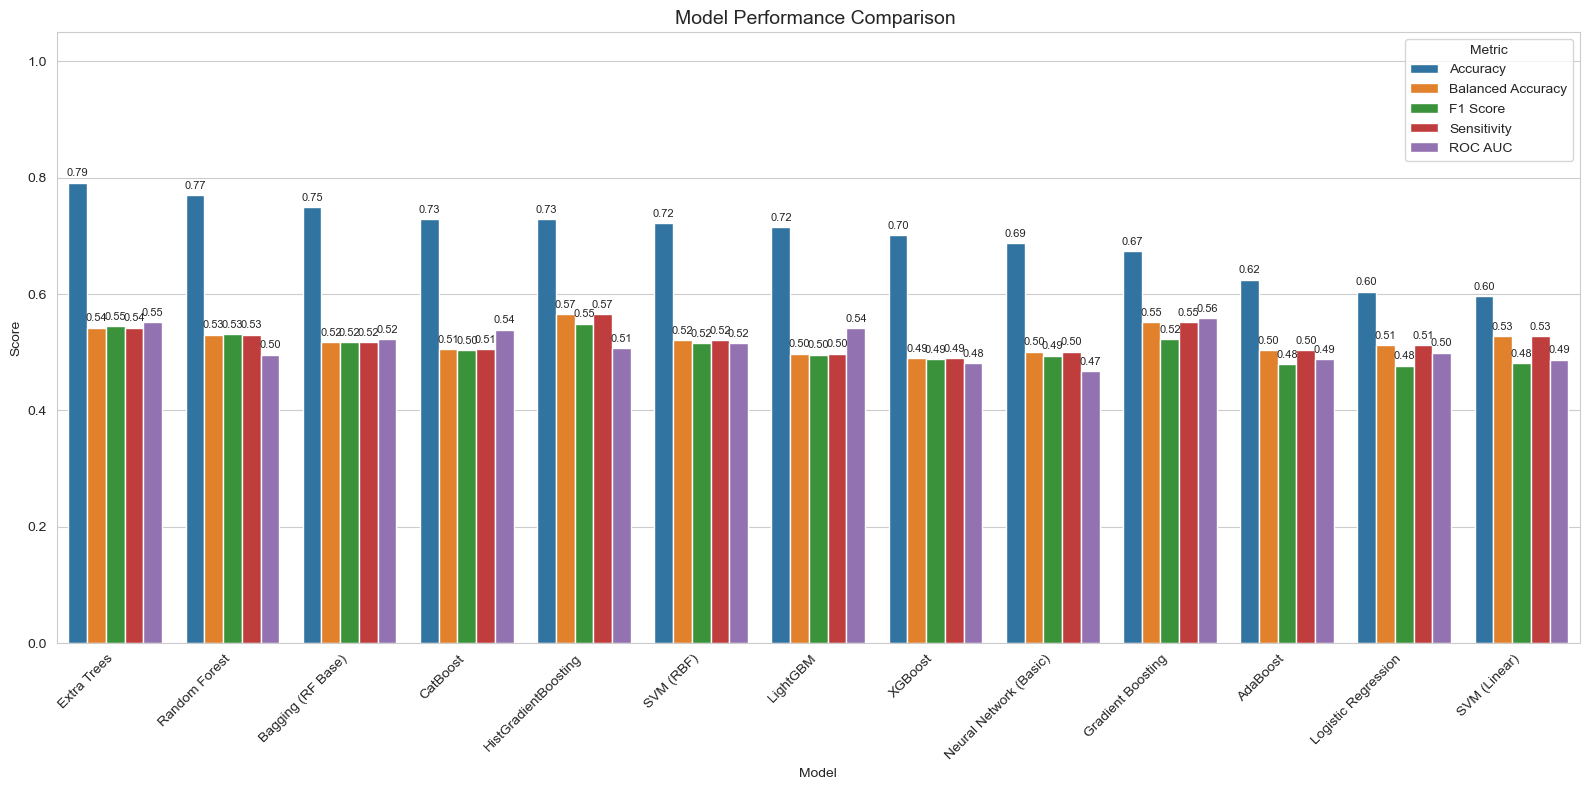

In [ ]:
# ---------------------
# Import Libraries
# ---------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    recall_score, roc_auc_score, classification_report
)
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE  # <--- Added import

# ---------------------
# Prepare Dataset
# ---------------------
# Assume X and y are defined before this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# ---------------------
# Define Models
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear", probability=True),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging (RF Base)": BaggingClassifier(),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Neural Network (Basic)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# ---------------------
# Evaluation Function
# ---------------------
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    sensitivity = recall_score(y_test, y_pred, average='macro')

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_score)
    except:
        roc_auc = np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1 Score": f1,
        "Sensitivity": sensitivity,
        "ROC AUC": roc_auc
    })

    print(f"\n=== Evaluating: {name} ===")
    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bal_acc:.4f}")
    print(f"F1 Score (macro):    {f1:.4f}")
    print(f"Recall (Sensitivity):{sensitivity:.4f}")
    print(f"ROC AUC Score:       {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# ---------------------
# Run and Evaluate Models
# ---------------------
for name, model in base_models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

# ---------------------
# Plot Results with Value Labels
# ---------------------
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="Accuracy", ascending=False)

# Melt for seaborn
df_melted = df_results_sorted.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="tab10")

# Show all value labels, even for same height bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.ylim(0, 1.05)  # ensure full space for value labels
plt.title("Model Performance Comparison ", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Metric")
plt.show()



=== Evaluating: Logistic Regression ===
Accuracy:            0.3504
Balanced Accuracy:   0.5346
F1 Score (macro):    0.3390
Recall (Sensitivity):0.5346
ROC AUC Score:       0.5321
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.28      0.43       118
           1       0.15      0.79      0.25        19

    accuracy                           0.35       137
   macro avg       0.52      0.53      0.34       137
weighted avg       0.79      0.35      0.40       137


=== Evaluating: SVM (Linear) ===
Accuracy:            0.3942
Balanced Accuracy:   0.5600
F1 Score (macro):    0.3750
Recall (Sensitivity):0.5600
ROC AUC Score:       0.5656
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.33      0.48       118
           1       0.16      0.79      0.27        19

    accuracy                           0.39       137
   macro avg       0.53      0.56      0.37       137


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:20:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Evaluating: Extra Trees ===
Accuracy:            0.4234
Balanced Accuracy:   0.5107
F1 Score (macro):    0.3855
Recall (Sensitivity):0.5107
ROC AUC Score:       0.5058
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.39      0.54       118
           1       0.14      0.63      0.23        19

    accuracy                           0.42       137
   macro avg       0.51      0.51      0.39       137
weighted avg       0.77      0.42      0.50       137


=== Evaluating: Bagging (RF Base) ===
Accuracy:            0.4526
Balanced Accuracy:   0.5497
F1 Score (macro):    0.4119
Recall (Sensitivity):0.5497
ROC AUC Score:       0.5335
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.42      0.57       118
           1       0.16      0.68      0.26        19

    accuracy                           0.45       137
   macro avg       0.52      0.55      0.41       137
wei

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== Evaluating: AdaBoost ===
Accuracy:            0.3358
Balanced Accuracy:   0.4599
F1 Score (macro):    0.3182
Recall (Sensitivity):0.4599
ROC AUC Score:       0.4817
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.29      0.43       118
           1       0.12      0.63      0.21        19

    accuracy                           0.34       137
   macro avg       0.48      0.46      0.32       137
weighted avg       0.73      0.34      0.40       137


=== Evaluating: HistGradientBoosting ===
Accuracy:            0.4088
Balanced Accuracy:   0.5022
F1 Score (macro):    0.3746
Recall (Sensitivity):0.5022
ROC AUC Score:       0.5268
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.37      0.52       118
           1       0.14      0.63      0.23        19

    accuracy                           0.41       137
   macro avg       0.50      0.50      0.37       137
wei

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Evaluating: Neural Network (Basic) ===
Accuracy:            0.4599
Balanced Accuracy:   0.5319
F1 Score (macro):    0.4122
Recall (Sensitivity):0.5319
ROC AUC Score:       0.4817
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.43      0.58       118
           1       0.15      0.63      0.24        19

    accuracy                           0.46       137
   macro avg       0.52      0.53      0.41       137
weighted avg       0.78      0.46      0.53       137



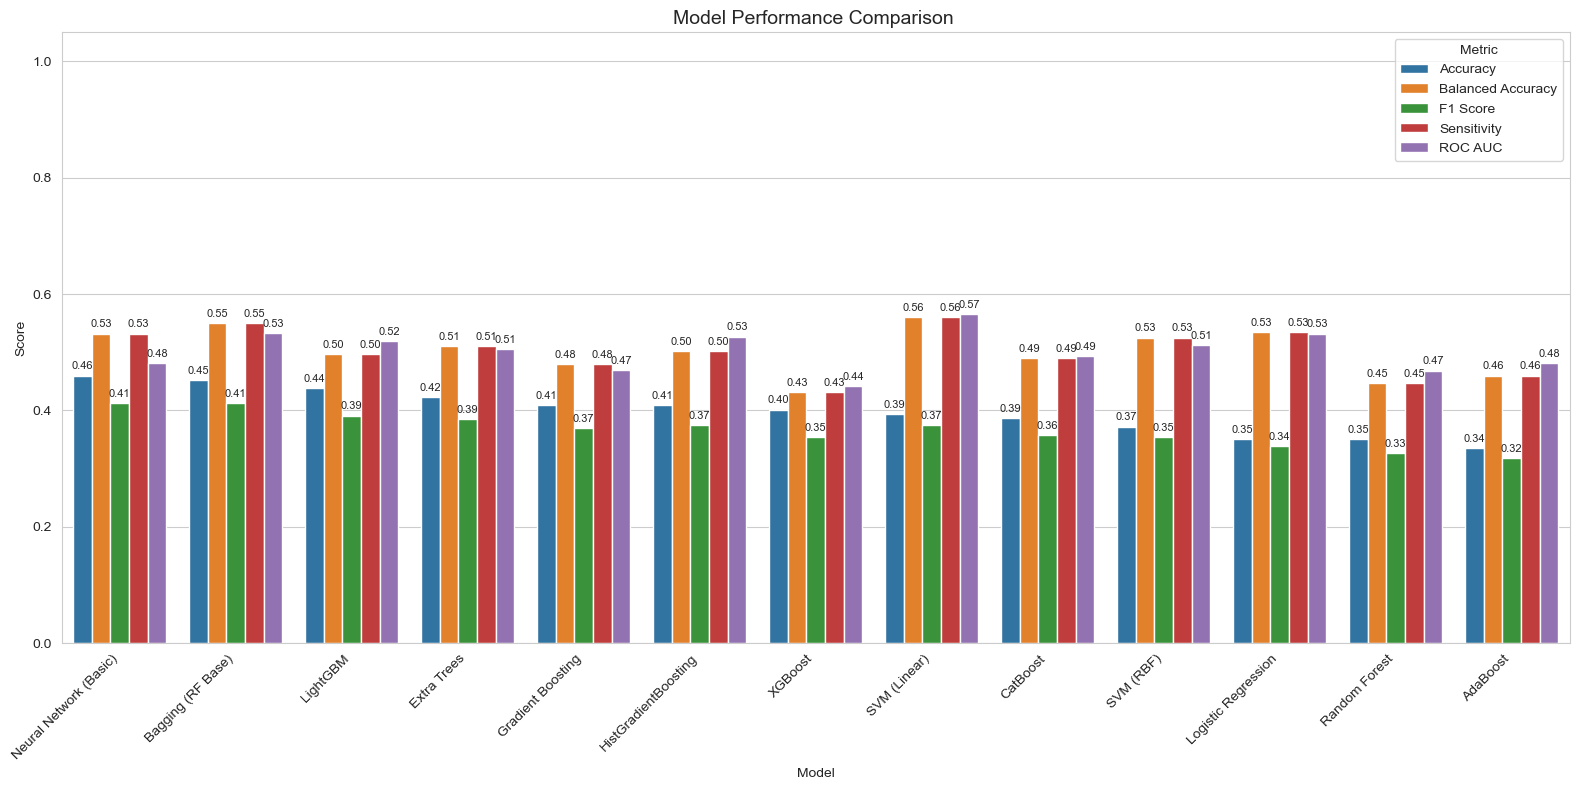

In [ ]:
# ---------------------
# Import Libraries
# ---------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    recall_score, roc_auc_score, classification_report
)
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE  # <--- Added import
from imblearn.combine import SMOTEENN
# ---------------------
# Prepare Dataset
# ---------------------
# Assume X and y are defined before this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTEENN(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# ---------------------
# Define Models
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear", probability=True),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging (RF Base)": BaggingClassifier(),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Neural Network (Basic)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# ---------------------
# Evaluation Function
# ---------------------
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    sensitivity = recall_score(y_test, y_pred, average='macro')

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_score)
    except:
        roc_auc = np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1 Score": f1,
        "Sensitivity": sensitivity,
        "ROC AUC": roc_auc
    })

    print(f"\n=== Evaluating: {name} ===")
    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bal_acc:.4f}")
    print(f"F1 Score (macro):    {f1:.4f}")
    print(f"Recall (Sensitivity):{sensitivity:.4f}")
    print(f"ROC AUC Score:       {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# ---------------------
# Run and Evaluate Models
# ---------------------
for name, model in base_models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

# ---------------------
# Plot Results with Value Labels
# ---------------------
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="Accuracy", ascending=False)

# Melt for seaborn
df_melted = df_results_sorted.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="tab10")

# Show all value labels, even for same height bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.ylim(0, 1.05)  # ensure full space for value labels
plt.title("Model Performance Comparison ", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Metric")
plt.show()



=== Evaluating: Logistic Regression ===
Accuracy:            0.6204
Balanced Accuracy:   0.5589
F1 Score (macro):    0.5011
Recall (Sensitivity):0.5589
ROC AUC Score:       0.5339
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.64      0.75       118
           1       0.18      0.47      0.26        19

    accuracy                           0.62       137
   macro avg       0.53      0.56      0.50       137
weighted avg       0.79      0.62      0.68       137


=== Evaluating: SVM (Linear) ===
Accuracy:            0.6131
Balanced Accuracy:   0.5326
F1 Score (macro):    0.4867
Recall (Sensitivity):0.5326
ROC AUC Score:       0.5277
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.64      0.74       118
           1       0.16      0.42      0.23        19

    accuracy                           0.61       137
   macro avg       0.52      0.53      0.49       137


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:21:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Evaluating: XGBoost ===
Accuracy:            0.7080
Balanced Accuracy:   0.5214
F1 Score (macro):    0.5107
Recall (Sensitivity):0.5214
ROC AUC Score:       0.5134
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       118
           1       0.16      0.26      0.20        19

    accuracy                           0.71       137
   macro avg       0.51      0.52      0.51       137
weighted avg       0.77      0.71      0.74       137


=== Evaluating: Extra Trees ===
Accuracy:            0.8175
Balanced Accuracy:   0.5408
F1 Score (macro):    0.5453
Recall (Sensitivity):0.5408
ROC AUC Score:       0.5230
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       118
           1       0.25      0.16      0.19        19

    accuracy                           0.82       137
   macro avg       0.56      0.54      0.55       137
weighted avg 

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== Evaluating: AdaBoost ===
Accuracy:            0.6277
Balanced Accuracy:   0.5190
F1 Score (macro):    0.4857
Recall (Sensitivity):0.5190
ROC AUC Score:       0.4973
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       118
           1       0.15      0.37      0.22        19

    accuracy                           0.63       137
   macro avg       0.51      0.52      0.49       137
weighted avg       0.77      0.63      0.68       137


=== Evaluating: HistGradientBoosting ===
Accuracy:            0.7445
Balanced Accuracy:   0.5205
F1 Score (macro):    0.5173
Recall (Sensitivity):0.5205
ROC AUC Score:       0.5107
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       118
           1       0.17      0.21      0.19        19

    accuracy                           0.74       137
   macro avg       0.52      0.52      0.52       137
wei

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Evaluating: Neural Network (Basic) ===
Accuracy:            0.7153
Balanced Accuracy:   0.5256
F1 Score (macro):    0.5154
Recall (Sensitivity):0.5256
ROC AUC Score:       0.4465
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       118
           1       0.17      0.26      0.20        19

    accuracy                           0.72       137
   macro avg       0.52      0.53      0.52       137
weighted avg       0.77      0.72      0.74       137



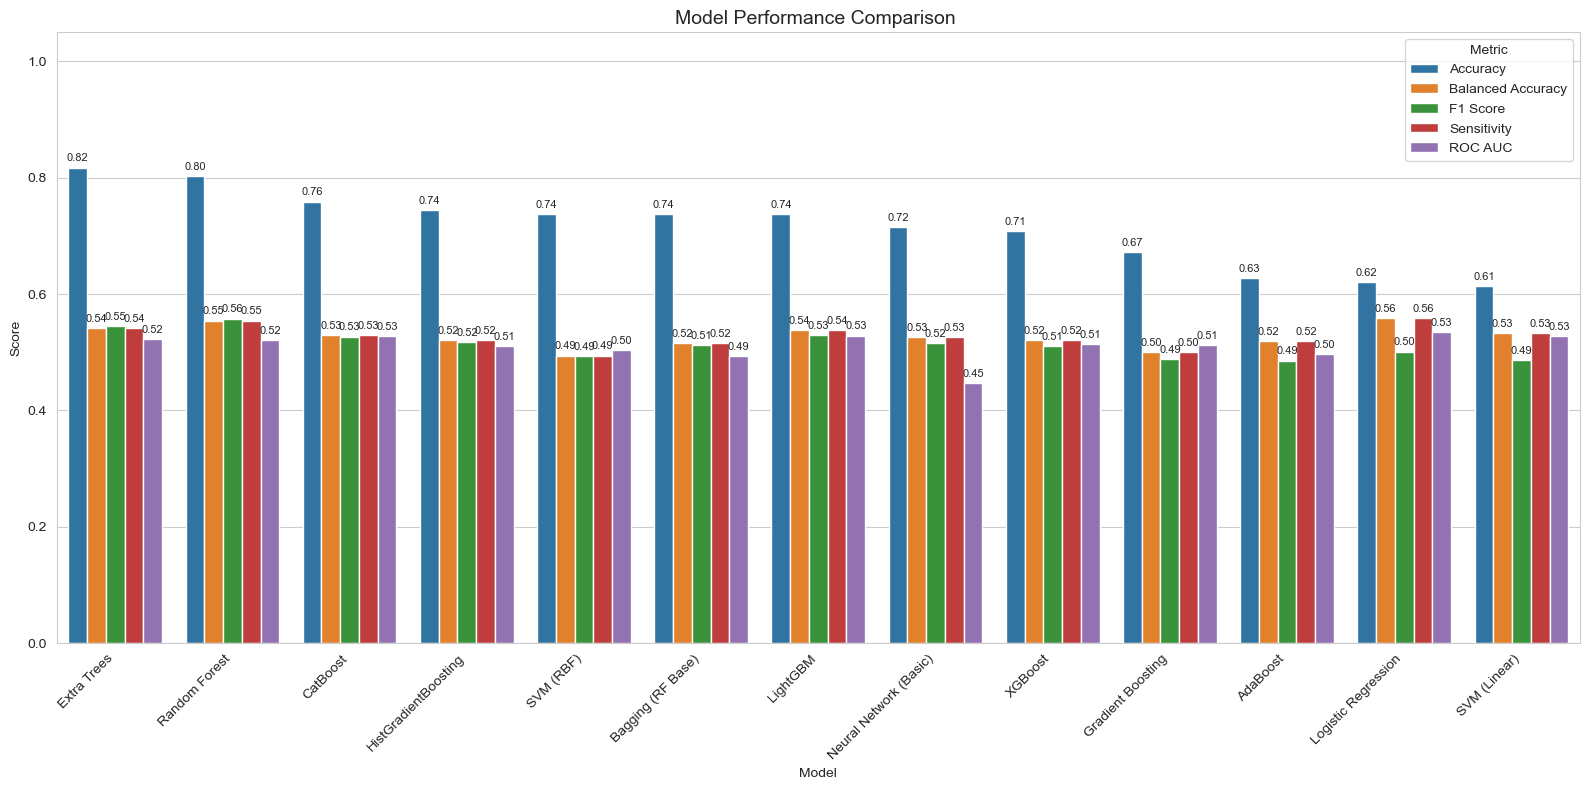

In [ ]:
# ---------------------
# Import Libraries
# ---------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    recall_score, roc_auc_score, classification_report
)
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE  # <--- Added import
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
# ---------------------
# Prepare Dataset
# ---------------------
# Assume X and y are defined before this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTETomek(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# ---------------------
# Define Models
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear", probability=True),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging (RF Base)": BaggingClassifier(),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Neural Network (Basic)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# ---------------------
# Evaluation Function
# ---------------------
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    sensitivity = recall_score(y_test, y_pred, average='macro')

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_score)
    except:
        roc_auc = np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1 Score": f1,
        "Sensitivity": sensitivity,
        "ROC AUC": roc_auc
    })

    print(f"\n=== Evaluating: {name} ===")
    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bal_acc:.4f}")
    print(f"F1 Score (macro):    {f1:.4f}")
    print(f"Recall (Sensitivity):{sensitivity:.4f}")
    print(f"ROC AUC Score:       {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# ---------------------
# Run and Evaluate Models
# ---------------------
for name, model in base_models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

# ---------------------
# Plot Results with Value Labels
# ---------------------
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="Accuracy", ascending=False)

# Melt for seaborn
df_melted = df_results_sorted.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="tab10")

# Show all value labels, even for same height bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.ylim(0, 1.05)  # ensure full space for value labels
plt.title("Model Performance Comparison ", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Metric")
plt.show()



=== Evaluating: Logistic Regression ===
Accuracy:            0.5855
Balanced Accuracy:   0.4518
F1 Score (macro):    0.4521
Recall (Sensitivity):0.4518
ROC AUC Score:       0.4859
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       114
           1       0.18      0.18      0.18        38

    accuracy                           0.59       152
   macro avg       0.45      0.45      0.45       152
weighted avg       0.59      0.59      0.59       152


=== Evaluating: SVM (Linear) ===
Accuracy:            0.5855
Balanced Accuracy:   0.4518
F1 Score (macro):    0.4521
Recall (Sensitivity):0.4518
ROC AUC Score:       0.4956
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       114
           1       0.18      0.18      0.18        38

    accuracy                           0.59       152
   macro avg       0.45      0.45      0.45       152


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:40:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Evaluating: Extra Trees ===
Accuracy:            0.7500
Balanced Accuracy:   0.5439
F1 Score (macro):    0.5299
Recall (Sensitivity):0.5439
ROC AUC Score:       0.5269
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       114
           1       0.50      0.13      0.21        38

    accuracy                           0.75       152
   macro avg       0.63      0.54      0.53       152
weighted avg       0.70      0.75      0.69       152


=== Evaluating: Bagging (RF Base) ===
Accuracy:            0.6645
Balanced Accuracy:   0.4956
F1 Score (macro):    0.4894
Recall (Sensitivity):0.4956
ROC AUC Score:       0.4373
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       114
           1       0.24      0.16      0.19        38

    accuracy                           0.66       152
   macro avg       0.49      0.50      0.49       152
wei

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== Evaluating: AdaBoost ===
Accuracy:            0.6184
Balanced Accuracy:   0.5526
F1 Score (macro):    0.5423
Recall (Sensitivity):0.5526
ROC AUC Score:       0.5669
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       114
           1       0.31      0.42      0.36        38

    accuracy                           0.62       152
   macro avg       0.54      0.55      0.54       152
weighted avg       0.66      0.62      0.64       152


=== Evaluating: HistGradientBoosting ===
Accuracy:            0.6645
Balanced Accuracy:   0.4956
F1 Score (macro):    0.4894
Recall (Sensitivity):0.4956
ROC AUC Score:       0.5510
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       114
           1       0.24      0.16      0.19        38

    accuracy                           0.66       152
   macro avg       0.49      0.50      0.49       152
wei

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Evaluating: Neural Network (Basic) ===
Accuracy:            0.6184
Balanced Accuracy:   0.4649
F1 Score (macro):    0.4618
Recall (Sensitivity):0.4649
ROC AUC Score:       0.5358
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       114
           1       0.19      0.16      0.17        38

    accuracy                           0.62       152
   macro avg       0.46      0.46      0.46       152
weighted avg       0.60      0.62      0.61       152



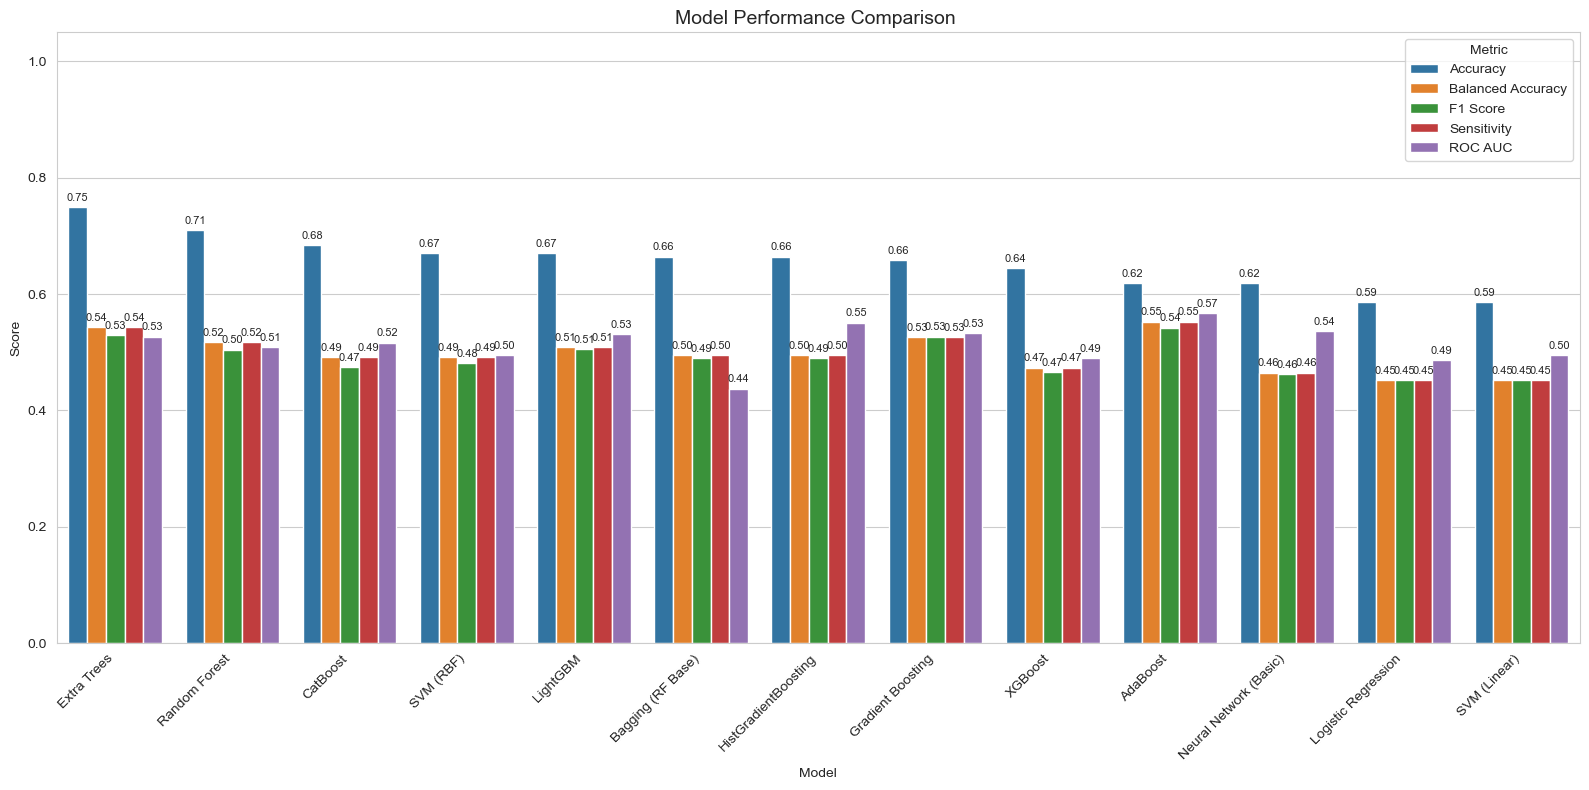

In [21]:
# ---------------------
# Import Libraries
# ---------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    recall_score, roc_auc_score, classification_report
)
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE  # <--- Added import
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
# ---------------------
# Prepare Dataset
# ---------------------
# Assume X and y are defined before this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = ADASYN(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# ---------------------
# Define Models
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear", probability=True),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging (RF Base)": BaggingClassifier(),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Neural Network (Basic)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# ---------------------
# Evaluation Function
# ---------------------
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    sensitivity = recall_score(y_test, y_pred, average='macro')

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_score)
    except:
        roc_auc = np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1 Score": f1,
        "Sensitivity": sensitivity,
        "ROC AUC": roc_auc
    })

    print(f"\n=== Evaluating: {name} ===")
    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bal_acc:.4f}")
    print(f"F1 Score (macro):    {f1:.4f}")
    print(f"Recall (Sensitivity):{sensitivity:.4f}")
    print(f"ROC AUC Score:       {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# ---------------------
# Run and Evaluate Models
# ---------------------
for name, model in base_models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

# ---------------------
# Plot Results with Value Labels
# ---------------------
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="Accuracy", ascending=False)

# Melt for seaborn
df_melted = df_results_sorted.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="tab10")

# Show all value labels, even for same height bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.ylim(0, 1.05)  # ensure full space for value labels
plt.title("Model Performance Comparison ", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Metric")
plt.show()


In [15]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    matthews_corrcoef, recall_score, roc_auc_score
)

from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ---------------------
# Assume X and y are defined
# ---------------------

# Define base models
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear", probability=True),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP (Neural Net)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "Slow Deeper Neural Net": MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=400, random_state=42),
    "Deep Neural Net": MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=400, random_state=42),
}

# ---------------------
# Evaluation Function
# ---------------------
def evaluate_models(X_train, X_test, y_train, y_test):
    result_rows = []
    for name, model in base_models.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            acc = accuracy_score(y_test, y_pred)
            bal_acc = balanced_accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='macro')
            mcc = matthews_corrcoef(y_test, y_pred)
            sensitivity = recall_score(y_test, y_pred, average='macro')

            try:
                if hasattr(model, "predict_proba"):
                    y_score = model.predict_proba(X_test)[:, 1]
                else:
                    y_score = model.decision_function(X_test)
                roc_auc = roc_auc_score(y_test, y_score)
            except:
                roc_auc = np.nan

            result_rows.append([name, acc, bal_acc, f1, mcc, sensitivity, roc_auc])

        except Exception as e:
            print(f"Error with model {name}: {e}")

    # Create and display result table
    df = pd.DataFrame(result_rows, columns=[
        "Model", "Accuracy", "BalancedAccuracy", "F1", "MCC", "Sensitivity", "ROC_AUC"
    ])
    df = df.sort_values(by="Accuracy", ascending=False)

    print(df.to_string(index=False, float_format="%.6f"))

# ---------------------
# Loop over random states and test sizes
# ---------------------
for rs in range(1, 162):
    for test_size in np.round(np.arange(0.20, 0.31, 0.01), 2):
        print(f"\n===== Random State: {rs}, Test Size: {test_size} =====")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rs)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        evaluate_models(X_train, X_test, y_train, y_test)



===== Random State: 1, Test Size: 0.2 =====
                 Model  Accuracy  BalancedAccuracy       F1       MCC  Sensitivity  ROC_AUC
          SVM (Linear)  0.763158          0.500000 0.432836  0.000000     0.500000 0.486351
             SVM (RBF)  0.763158          0.500000 0.432836  0.000000     0.500000 0.420498
         Random Forest  0.763158          0.500000 0.432836  0.000000     0.500000 0.576269
              AdaBoost  0.763158          0.528736 0.502726  0.125481     0.528736 0.559866
   Logistic Regression  0.756579          0.505268 0.455830  0.032205     0.505268 0.536398
              CatBoost  0.756579          0.495690 0.430712 -0.045335     0.495690 0.590038
     Gradient Boosting  0.743421          0.496648 0.450246 -0.015982     0.496648 0.637692
              LightGBM  0.730263          0.507184 0.484063  0.023576     0.507184 0.569444
      MLP (Neural Net)  0.730263          0.564655 0.568869  0.153410     0.564655 0.622605
  HistGradientBoosting  0.723684   

In [ ]:
# ---------------------
# Import Libraries
# ---------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, matthews_corrcoef, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19, random_state=141)

# ---------------------
# Define Models
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear"),
    "SVM (RBF)": SVC(kernel="rbf"),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
     "Bagging (RF Base)": BaggingClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Neural Network (Basic)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}


def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n\n=== Evaluating: {name} ===")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Accuracy:            {accuracy_score(y_test, y_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score (macro):    {f1_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Recall (macro):      {recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Sensitivity (Recall):{recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_pred):.4f}")

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]  # Get the probability for class 1
        else:
            y_score = model.decision_function(X_test)
        
        roc_auc = roc_auc_score(y_test, y_score)
        print(f"ROC AUC Score:       {roc_auc:.4f}")
    except Exception as e:
        print(f"ROC AUC Score:       Not available ({e})")

    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
for name, model in base_models.items():
    print(f"\n=== Running: {name} ===")
    evaluate_model(name, model, X_train, y_train, X_test, y_test)



=== Running: Logistic Regression ===


=== Evaluating: Logistic Regression ===
Accuracy:            0.8264
Balanced Accuracy:   0.5035
F1 Score (macro):    0.4891
Recall (macro):      0.5035
Sensitivity (Recall):0.5035
MCC:                 0.0123
ROC AUC Score:       0.5436
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       123
           1       0.17      0.05      0.07        21

    accuracy                           0.83       144
   macro avg       0.51      0.50      0.49       144
weighted avg       0.75      0.83      0.78       144


=== Running: SVM (Linear) ===


=== Evaluating: SVM (Linear) ===
Accuracy:            0.8542
Balanced Accuracy:   0.5000
F1 Score (macro):    0.4607
Recall (macro):      0.5000
Sensitivity (Recall):0.5000
MCC:                 0.0000
ROC AUC Score:       0.4588
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00 


=== Evaluating: Logistic Regression ===
Accuracy:            0.8264
Balanced Accuracy:   0.5035
F1 Score (macro):    0.4891
Recall (Sensitivity):0.5035
ROC AUC Score:       0.5436
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       123
           1       0.17      0.05      0.07        21

    accuracy                           0.83       144
   macro avg       0.51      0.50      0.49       144
weighted avg       0.75      0.83      0.78       144


=== Evaluating: SVM (Linear) ===
Accuracy:            0.8542
Balanced Accuracy:   0.5000
F1 Score (macro):    0.4607
Recall (Sensitivity):0.5000
ROC AUC Score:       0.4588
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       123
           1       0.00      0.00      0.00        21

    accuracy                           0.85       144
   macro avg       0.43      0.50      0.46       144


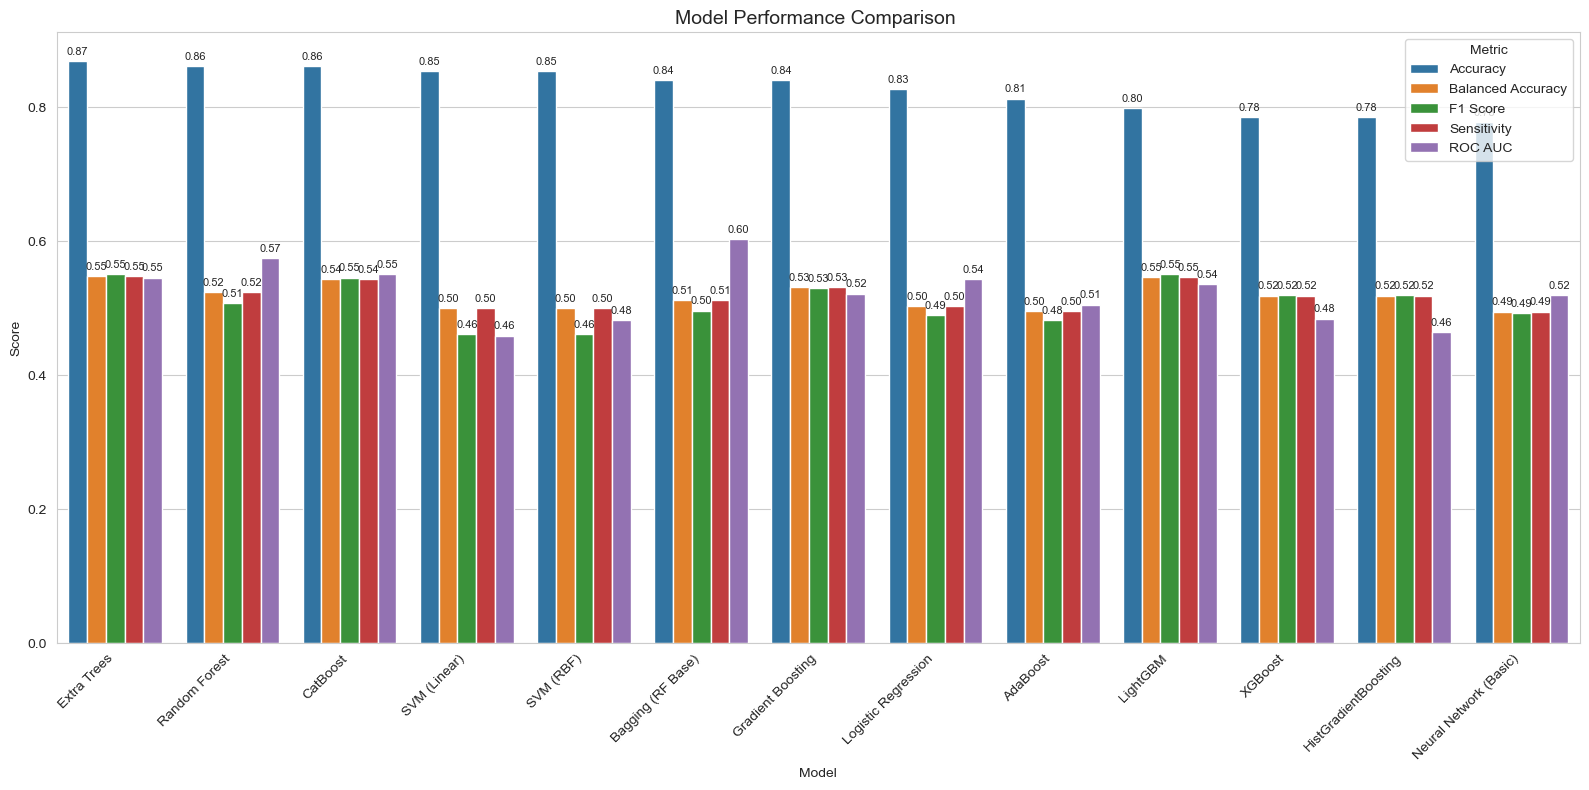

In [ ]:
# ---------------------
# Import Libraries
# ---------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    recall_score, roc_auc_score, classification_report
)
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19, random_state=141)


# ---------------------
# Define Models
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear", probability=True),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging (RF Base)": BaggingClassifier(),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Neural Network (Basic)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# ---------------------
# Evaluation Function
# ---------------------
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    sensitivity = recall_score(y_test, y_pred, average='macro')

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_score)
    except:
        roc_auc = np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1 Score": f1,
        "Sensitivity": sensitivity,
        "ROC AUC": roc_auc
    })

    print(f"\n=== Evaluating: {name} ===")
    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bal_acc:.4f}")
    print(f"F1 Score (macro):    {f1:.4f}")
    print(f"Recall (Sensitivity):{sensitivity:.4f}")
    print(f"ROC AUC Score:       {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# ---------------------
# Run and Evaluate Models
# ---------------------
for name, model in base_models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

# ---------------------
# Plot Results with Value Labels
# ---------------------
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="Accuracy", ascending=False)

# Melt for seaborn
df_melted = df_results_sorted.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="tab10")

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3, fontsize=8)

plt.title("Model Performance Comparison ", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Metric")
plt.show()



=== Evaluating: Logistic Regression ===
Accuracy:            0.8171
Balanced Accuracy:   0.5035
F1 Score (macro):    0.4788
Recall (Sensitivity):0.5035
ROC AUC Score:       0.5574
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       146
           1       0.20      0.03      0.06        29

    accuracy                           0.82       175
   macro avg       0.52      0.50      0.48       175
weighted avg       0.73      0.82      0.76       175


=== Evaluating: SVM (Linear) ===
Accuracy:            0.8343
Balanced Accuracy:   0.5000
F1 Score (macro):    0.4548
Recall (Sensitivity):0.5000
ROC AUC Score:       0.5406
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       146
           1       0.00      0.00      0.00        29

    accuracy                           0.83       175
   macro avg       0.42      0.50      0.45       175


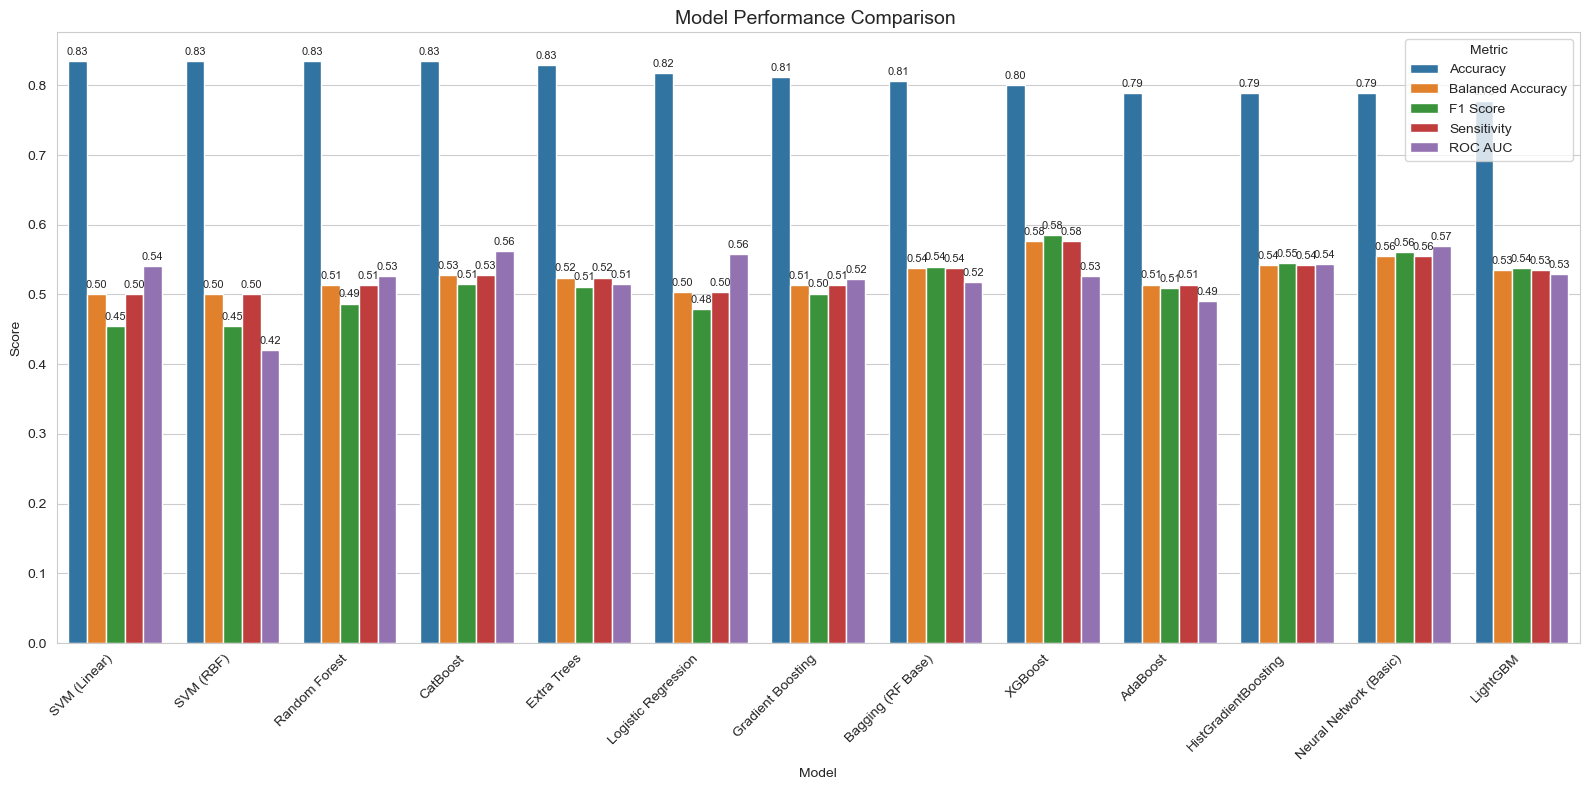

In [25]:
# ---------------------
# Import Libraries
# ---------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    recall_score, roc_auc_score, classification_report
)
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ---------------------
# Prepare Dataset
# ---------------------
# Assume X and y are defined before this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=141)

# ---------------------
# Define Models
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear", probability=True),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging (RF Base)": BaggingClassifier(),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Neural Network (Basic)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# ---------------------
# Evaluation Function
# ---------------------
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    sensitivity = recall_score(y_test, y_pred, average='macro')

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_score)
    except:
        roc_auc = np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1 Score": f1,
        "Sensitivity": sensitivity,
        "ROC AUC": roc_auc
    })

    print(f"\n=== Evaluating: {name} ===")
    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bal_acc:.4f}")
    print(f"F1 Score (macro):    {f1:.4f}")
    print(f"Recall (Sensitivity):{sensitivity:.4f}")
    print(f"ROC AUC Score:       {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# ---------------------
# Run and Evaluate Models
# ---------------------
for name, model in base_models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

# ---------------------
# Plot Results with Value Labels
# ---------------------
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="Accuracy", ascending=False)

# Melt for seaborn
df_melted = df_results_sorted.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="tab10")

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3, fontsize=8)

plt.title("Model Performance Comparison ", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Metric")
plt.show()


Original distribution: Counter({0: 577, 1: 180})
Resampled distribution: Counter({1: 513, 0: 180})
Train distribution: Counter({1: 410, 0: 144})
Test distribution: Counter({1: 103, 0: 36})

=== Running: Logistic Regression ===
Best Parameters: {'clf__C': 10}


=== Evaluating: Logistic Regression ===
Accuracy:            0.7482
Balanced Accuracy:   0.5139
F1 Score:            0.8548
Recall (Sensitivity):1.0000
MCC:                 0.1440
ROC AUC Score:       0.7818
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        36
           1       0.75      1.00      0.85       103

    accuracy                           0.75       139
   macro avg       0.87      0.51      0.45       139
weighted avg       0.81      0.75      0.65       139


=== Running: SVM (Linear) ===


=== Evaluating: SVM (Linear) ===
Accuracy:            0.7482
Balanced Accuracy:   0.5139
F1 Score:            0.8548
Recall (Sensitivity):1.0000
MCC

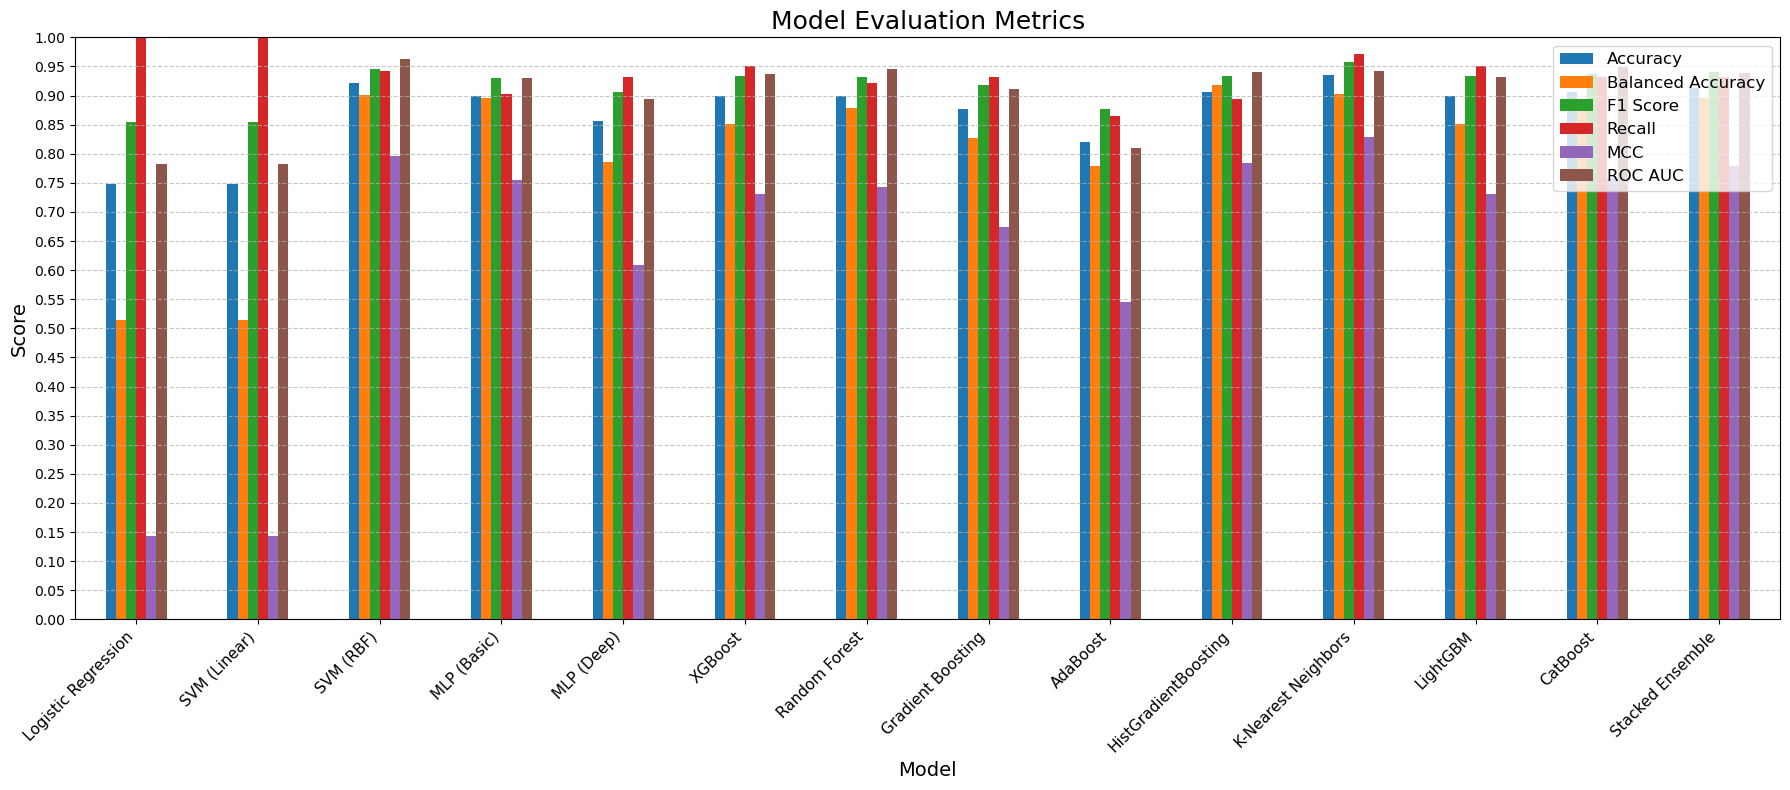

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from collections import Counter

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, recall_score,
    matthews_corrcoef, roc_auc_score, classification_report, precision_recall_curve
)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Imbalanced-learn
from imblearn.combine import SMOTEENN

# Boosting libs
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ---------------------
# Helper: Best threshold
# ---------------------
def find_best_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

# ---------------------
# Evaluation Function
# ---------------------
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n\n=== Evaluating: {name} ===")
    
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    threshold = find_best_threshold(y_test, y_proba)
    y_pred = (y_proba >= threshold).astype(int)

    acc = accuracy_score(y_test, y_pred)
    bacc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bacc:.4f}")
    print(f"F1 Score:            {f1:.4f}")
    print(f"Recall (Sensitivity):{recall:.4f}")
    print(f"MCC:                 {mcc:.4f}")
    print(f"ROC AUC Score:       {auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    return {
        "Accuracy": acc,
        "Balanced Accuracy": bacc,
        "F1 Score": f1,
        "Recall": recall,
        "MCC": mcc,
        "ROC AUC": auc
    }

X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX']).values
y = data_cleaned_with_just_dx_and_snp['DX'].values



sampler = SMOTEENN(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)

print("Original distribution:", Counter(y))
print("Resampled distribution:", Counter(y_resampled))

# ---------------------
# Train/Test Split
# ---------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

print("Train distribution:", Counter(y_train))
print("Test distribution:", Counter(y_test))

# ---------------------
# Models + Pipelines
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# Optional: Basic tuning for some models
param_grid = {
    "Logistic Regression": {'clf__C': [0.1, 1, 10]},
    "SVM (RBF)": {'clf__C': [0.1, 1, 10], 'clf__gamma': ['scale', 'auto']},
    "Random Forest": {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 10, 20]},
}


# ---------------------
# Run all models and store metrics
# ---------------------
results = {}

for name, model in base_models.items():
    print(f"\n=== Running: {name} ===")
    
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    
    if name in param_grid:
        grid = GridSearchCV(pipe, param_grid[name], cv=5, scoring='f1', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print("Best Parameters:", grid.best_params_)
    else:
        best_model = pipe 

    metrics = evaluate_model(name, best_model, X_train, y_train, X_test, y_test)
    results[name] = metrics

# ---------------------
# Plotting metrics
# ---------------------
df_results = pd.DataFrame(results).T

plot_metrics = ["Accuracy", "Balanced Accuracy", "F1 Score", "Recall", "MCC", "ROC AUC"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig, ax = plt.subplots(figsize=(18, 8))
df_results[plot_metrics].plot(kind='bar', ax=ax, color=colors)

ax.set_title("Model Evaluation Metrics", fontsize=18)
ax.set_ylabel("Score", fontsize=14)
ax.set_xlabel("Model", fontsize=14)
ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=11)
ax.legend(loc="upper right", fontsize=12)

# Set y-axis ticks and format
ax.set_ylim(0, 1.0)
ax.set_yticks(np.arange(0, 1.01, 0.05))  # Add this line for 0.05 increments
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

ax.grid(True, linestyle='--', axis='y', alpha=0.7)

plt.tight_layout()
plt.show()



In [ ]:
# import warnings
# warnings.filterwarnings("ignore")

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.ticker as mticker

# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.ensemble import (
#     RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
#     HistGradientBoostingClassifier, StackingClassifier
# )
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import (
#     accuracy_score, balanced_accuracy_score, f1_score,
#     roc_auc_score, matthews_corrcoef, recall_score
# )
# from imblearn.combine import SMOTETomek
# from imblearn.pipeline import Pipeline

# # Generate a synthetic dataset


# # Cross-validation evaluation
# def evaluate_model_cv(model, X, y):
#     kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
#     accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

#     for train_idx, val_idx in kf.split(X, y):
#         X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
#         y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]


#         pipeline = Pipeline([
#             ('scaler', StandardScaler()),
#             ('smt', SMOTETomek(random_state=42)),
#             ('clf', model)
#         ])

#         pipeline.fit(X_tr, y_tr)
#         y_val_pred = pipeline.predict(X_val)
#         y_val_proba = pipeline.predict_proba(X_val)[:, 1]

#         accs.append(accuracy_score(y_val, y_val_pred))
#         baccs.append(balanced_accuracy_score(y_val, y_val_pred))
#         f1s.append(f1_score(y_val, y_val_pred))
#         mccs.append(matthews_corrcoef(y_val, y_val_pred))
#         recalls.append(recall_score(y_val, y_val_pred))
#         aucs.append(roc_auc_score(y_val, y_val_proba))

#     return {
#         "Accuracy": np.mean(accs),
#         "Balanced Accuracy": np.mean(baccs),
#         "F1 Score": np.mean(f1s),
#         "Recall (Sensitivity)": np.mean(recalls),
#         "MCC": np.mean(mccs),
#         "ROC AUC": np.mean(aucs)
#     }

# # Test set evaluation
# def evaluate_on_test(model, X_train, y_train, X_test, y_test):
#     pipeline = Pipeline([
#         ('scaler', StandardScaler()),
#         ('smt', SMOTETomek(random_state=42)),
#         ('clf', model)
#     ])
#     pipeline.fit(X_train, y_train)
#     y_pred = pipeline.predict(X_test)
#     y_proba = pipeline.predict_proba(X_test)[:, 1]

#     return {
#         "Test Accuracy": accuracy_score(y_test, y_pred),
#         "Test Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
#         "Test F1 Score": f1_score(y_test, y_pred),
#         "Test Recall": recall_score(y_test, y_pred),
#         "Test MCC": matthews_corrcoef(y_test, y_pred),
#         "Test ROC AUC": roc_auc_score(y_test, y_proba)
#     }

# # Define classifiers
# models = {
#     "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
#     "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
#     "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
#     "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
#     "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
#     "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
#     "Random Forest": RandomForestClassifier(class_weight='balanced'),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "AdaBoost": AdaBoostClassifier(),
#     "HistGradientBoosting": HistGradientBoostingClassifier(),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
#     "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
#     "Stacked Ensemble": StackingClassifier(
#         estimators=[
#             ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
#             ('mlp', MLPClassifier(max_iter=1000))
#         ],
#         final_estimator=LogisticRegression()
#     )
# }

# custom_colors = [
#     '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
#     '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
#     '#BCBD22', '#17BECF', '#D62728', '#9467BD'
# ]

# # Multiple random seeds
# random_states = [66, 20, 87, 141, 69, 90]
# all_results = {}

# for seed in random_states:
#     print(f"\n📌 Evaluating for random state: {seed}")

#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=seed, stratify=y
#     )

#     results_combined = {}

#     for name, model in models.items():
#         print(f"→ Evaluating {name}")
#         metrics_cv = evaluate_model_cv(model, X_train, y_train)
#         metrics_test = evaluate_on_test(model, X_train, y_train, X_test, y_test)
#         combined = {**metrics_cv, **metrics_test}
#         results_combined[name] = combined

#     df_results = pd.DataFrame(results_combined).T
#     all_results[seed] = df_results

#     print("\n📊 CV + Test Results:")
#     print(df_results.round(4))

#     # Plotting
#     fig, ax = plt.subplots(figsize=(26, 12))
#     plot_columns = [
#         "Accuracy", "F1 Score", "ROC AUC",
#         "Test Accuracy", "Test F1 Score", "Test ROC AUC"
#     ]
#     df_results[plot_columns].plot(kind='bar', ax=ax, color=custom_colors[:len(plot_columns)])

#     ax.set_title(f"Model CV + Test Performance - Random State {seed}", fontsize=20)
#     ax.set_ylabel("Score", fontsize=16)
#     ax.set_xlabel("Model", fontsize=16)
#     ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
#     ax.legend(loc="upper right", fontsize=12)

#     # ✅ Set y-axis from 0.00 to 1.00 with ticks every 0.05
#     custom_yticks = np.arange(0.00, 1.01, 0.05)
#     ax.set_yticks(custom_yticks)
#     ax.set_ylim(0.00, 1.00)
#     ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
#     ax.tick_params(axis='y', labelsize=12)
#     ax.grid(axis='y', which='major', linestyle='--', alpha=0.7)

#     plt.tight_layout()
#     plt.show()